# Analyse Exploratoire des Données

Ce notebook contient une analyse exploratoire des données pour comprendre les patterns des revenus des ventes de smartphones.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les données
data_path = 'C:/Users/user/Downloads/test_technique_datascientist (3)/telecom_sales_data.csv'
data = pd.read_csv(data_path)

# Aperçu des données
print("Aperçu des données :")
print(data.head())
print("\nRésumé des données :")
print(data.info())

# Conversion des colonnes de dates si nécessaire
if 'date' in data.columns:
    data['date'] = pd.to_datetime(data['date'])

Aperçu des données :
   Unnamed: 0  marketing_score  competition_index  customer_satisfaction  \
0  2019-01-01           100.00              50.00                   85.0   
1  2019-01-02           100.09              50.52                   85.0   
2  2019-01-03           100.18              51.04                   85.0   
3  2019-01-04           100.27              51.56                   85.0   
4  2019-01-05           100.36              52.08                   85.0   

   purchasing_power_index weather_condition tech_event 5g_phase  \
0                  120.00               Bad       None   Pre-5G   
1                  120.09              Good       None   Pre-5G   
2                  120.17          Moderate       None   Pre-5G   
3                  120.26          Moderate       None   Pre-5G   
4                  120.34               Bad       None   Pre-5G   

   store_traffic public_transport   city  jPhone_Pro_revenue  \
0           0.02              Hub  Paris           1221

In [9]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les données
data_path = 'C:/Users/user/Downloads/test_technique_datascientist (3)/telecom_sales_data.csv'
data = pd.read_csv(data_path)

# Aperçu des données
print("Aperçu des données :")
print(data.head())
print("\nRésumé des données :")
print(data.info())

# Nettoyage des données
print("\n--- Nettoyage des données ---")


# Gestion des valeurs manquantes
missing_summary = data.isnull().sum()
print("\nValeurs manquantes avant nettoyage :")
print(missing_summary[missing_summary > 0])

# Suppression des lignes avec trop de valeurs manquantes (seuil 50%)
threshold = len(data.columns) * 0.5
data = data.dropna(thresh=threshold, axis=0)
print(f"\nDonnées après suppression des lignes avec plus de {threshold} valeurs manquantes : {len(data)} lignes restantes.")

# Remplissage des valeurs manquantes par des stratégies appropriées
for column in data.columns:
    if data[column].dtype == 'object':
        # Remplir par la valeur la plus fréquente
        data[column].fillna(data[column].mode()[0], inplace=True)
    else:
        # Remplir par la moyenne
        data[column].fillna(data[column].mean(), inplace=True)

# Vérification des valeurs manquantes
print("\nValeurs manquantes après nettoyage :")
print(data.isnull().sum().sum())

# Conversion des colonnes de date
if 'unnamed:_0' in data.columns:
    try:
        data['unnamed:_0'] = pd.to_datetime(data['unnamed:_0'], errors='coerce')
        print("\nConversion de la colonne 'Unnamed: 0' en format datetime réussie.")
    except Exception as e:
        print(f"Erreur lors de la conversion : {e}")

# Suppression des doublons
initial_length = len(data)
data.drop_duplicates(inplace=True)
print(f"\nDoublons supprimés : {initial_length - len(data)} lignes supprimées.")

# Aperçu final des données
print("\nAperçu final des données nettoyées :")
print(data.head())


Aperçu des données :
   Unnamed: 0  marketing_score  competition_index  customer_satisfaction  \
0  2019-01-01           100.00              50.00                   85.0   
1  2019-01-02           100.09              50.52                   85.0   
2  2019-01-03           100.18              51.04                   85.0   
3  2019-01-04           100.27              51.56                   85.0   
4  2019-01-05           100.36              52.08                   85.0   

   purchasing_power_index weather_condition tech_event 5g_phase  \
0                  120.00               Bad       None   Pre-5G   
1                  120.09              Good       None   Pre-5G   
2                  120.17          Moderate       None   Pre-5G   
3                  120.26          Moderate       None   Pre-5G   
4                  120.34               Bad       None   Pre-5G   

   store_traffic public_transport   city  jPhone_Pro_revenue  \
0           0.02              Hub  Paris           1221

## Statistiques descriptives des revenus

In [10]:
# Statistiques descriptives
print("\nStatistiques descriptives des revenus :")
print(data[['jPhone_Pro_revenue', 'Kaggle_Pixel_5_revenue', 'Planet_SX_revenue']].describe())


Statistiques descriptives des revenus :
       jPhone_Pro_revenue  Kaggle_Pixel_5_revenue  Planet_SX_revenue
count        17536.000000            17536.000000       17536.000000
mean         83883.185692            40562.879091       21856.485142
std          55005.879332            26005.452647       13744.180207
min              0.000000             1576.180000        1066.710000
25%          47520.925000            23072.357500       12767.720000
50%          74285.135000            35292.320000       19183.725000
75%         100716.447500            48998.450000       25955.000000
max         536859.730000           239736.500000      103250.710000


## Visualisation des tendances de revenus

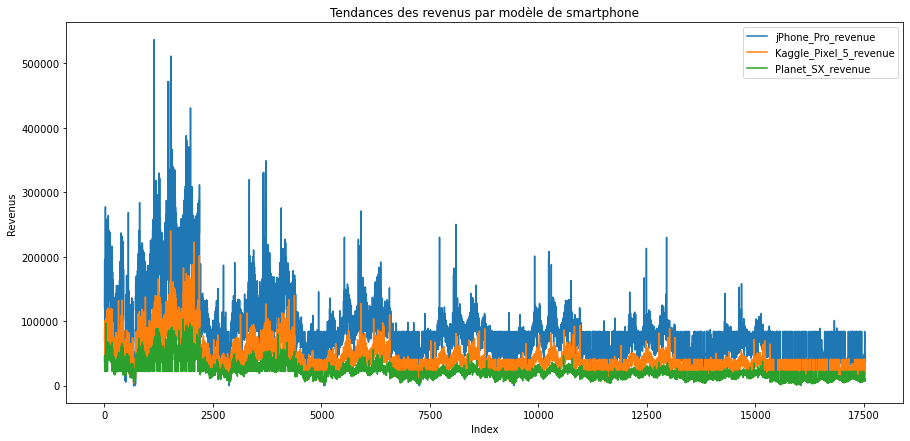

In [11]:
# Visualisation des revenus
def plot_revenue_trends(data):
    plt.figure(figsize=(15, 7))
    for model in ['jPhone_Pro_revenue', 'Kaggle_Pixel_5_revenue', 'Planet_SX_revenue']:
        plt.plot(data.index, data[model], label=model)
    plt.xlabel('Index')
    plt.ylabel('Revenus')
    plt.title('Tendances des revenus par modèle de smartphone')
    plt.legend()
    plt.show()

plot_revenue_trends(data)

## Analyse des corrélations

C:\Users\user\AppData\Local\Temp\ipykernel_12156\3334871768.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


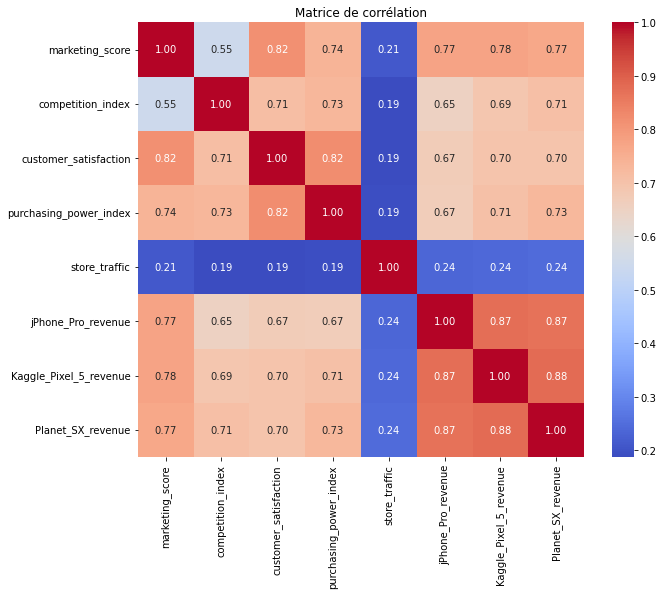

In [12]:
# Analyse des corrélations
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Matrice de corrélation')
plt.show()